# The big idea

In this iteration (following parts 1 and 2), we are going to apply the variability selection criteria we developed in `stetson_vs_mag.py`.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
from wuvars.data import spreadsheet

spread = spreadsheet.load_v2()


In [4]:
%run ../variability_selection_curved.py

In [5]:
import wuvars.analysis.variability_selection as sv

In [6]:
lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

inspect_onc = pd.read_csv(os.path.join(lc_dir, "inspection_onc.csv"), skipinitialspace=True)
inspect_ngc = pd.read_csv(os.path.join(lc_dir, "inspection_ngc.csv"), skipinitialspace=True)
inspect_ic = pd.read_csv(os.path.join(lc_dir, "inspection_ic.csv"), skipinitialspace=True)

approved_sources_onc = inspect_onc['SOURCEID'][inspect_onc['exclude?'] != 'yes']
approved_sources_ngc = inspect_ngc['SOURCEID'][inspect_ngc['exclude?'] != 'yes']
approved_sources_ic = inspect_ic['SOURCEID'][inspect_ic['exclude?'] != 'yes']

approved = {}
approved[5] = approved_sources_onc
approved[7] = approved_sources_ngc
approved[8] = approved_sources_ic

In [101]:
spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_ic = pd.read_excel(
    os.path.join(spreadsheet_dir, "IC_source_properties_periods_inspected.xlsx")
)
period_sheet_onc = pd.read_excel(
    os.path.join(spreadsheet_dir, "ONC_source_properties_periods_inspected.xlsx")
)
period_sheet_ngc = pd.read_excel(
    os.path.join(spreadsheet_dir, "NGC_source_properties_periods_inspected.xlsx")
)

flags = ['Y', 'Yw', 'N', 'YfY', '?fY', 'YfYw', '?fYw', "YfN", "?fN"]
periodic_flags = [flag for flag in flags if flag[-1] in ('Y', 'w')]

periodic_onc = period_sheet_onc[np.in1d(period_sheet_onc['Periodic?'], periodic_flags)]
periodic_ngc = period_sheet_ngc[np.in1d(period_sheet_ngc['Periodic?'], periodic_flags)]
periodic_ic = period_sheet_ic[np.in1d(period_sheet_ic['Periodic?'], periodic_flags)]

periodic = {}
periodic[5] = periodic_onc
periodic[7] = periodic_ngc
periodic[8] = periodic_ic

In [8]:
load_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/stetson_v_mag"
    
StetsonJHK_dict = {}
StetsonJHK_dict_95 = {}
StetsonJHK_dict_50 = {}

for wserv in [5, 7, 8]:
    r997 = np.load(
        os.path.join(load_dir, f"WSERV{wserv}_result_grid_997.npy")
    )
    StetsonJHK_dict[wserv] = r997
    r95 = np.load(
        os.path.join(load_dir, f"WSERV{wserv}_result_grid_95.npy")
    )
    StetsonJHK_dict_95[wserv] = r95    
    r50 = np.load(
        os.path.join(load_dir, f"WSERV{wserv}_result_grid_50.npy")
    )
    StetsonJHK_dict_50[wserv] = r50        

WSERV5:
  VLMS stars in our data: 331
  VLMS Q=2 stars: 193
  VLMS Q=2 variables (ignoring periodicity): 81
  VLMS Q=2 'almost' variables: 10
  VLMS Q=2 periodic: 49
  VLMS Q=2 variables (incl. periodics): 92

BDs:                331
BDs (Q=2):          193
Periodic BDs:       78
Periodic BDs (Q=2): 49
Variable BDs (Q=2): 81
  '' - periodics  : 43
Variable BDs (Q=1): 47
  '' - v2:          5
V0 BDs (Q=0):       68
Variable BDs (Q=1+2+per): 122



Periodic variables (78):  Int64Index([44199508469091, 44199508469098, 44199508469125, 44199508469253,
            44199508469301, 44199508469615, 44199508469644, 44199508469694,
            44199508469696, 44199508469840, 44199508469998, 44199508470345,
            44199508470557, 44199508470578, 44199508470698, 44199508470788,
            44199508471261, 44199508471300, 44199508471513, 44199508471912,
            44199508472007, 44199508511895, 44199508511903, 44199508511913,
            44199508511914, 44199508511927, 44199508511973, 4419950

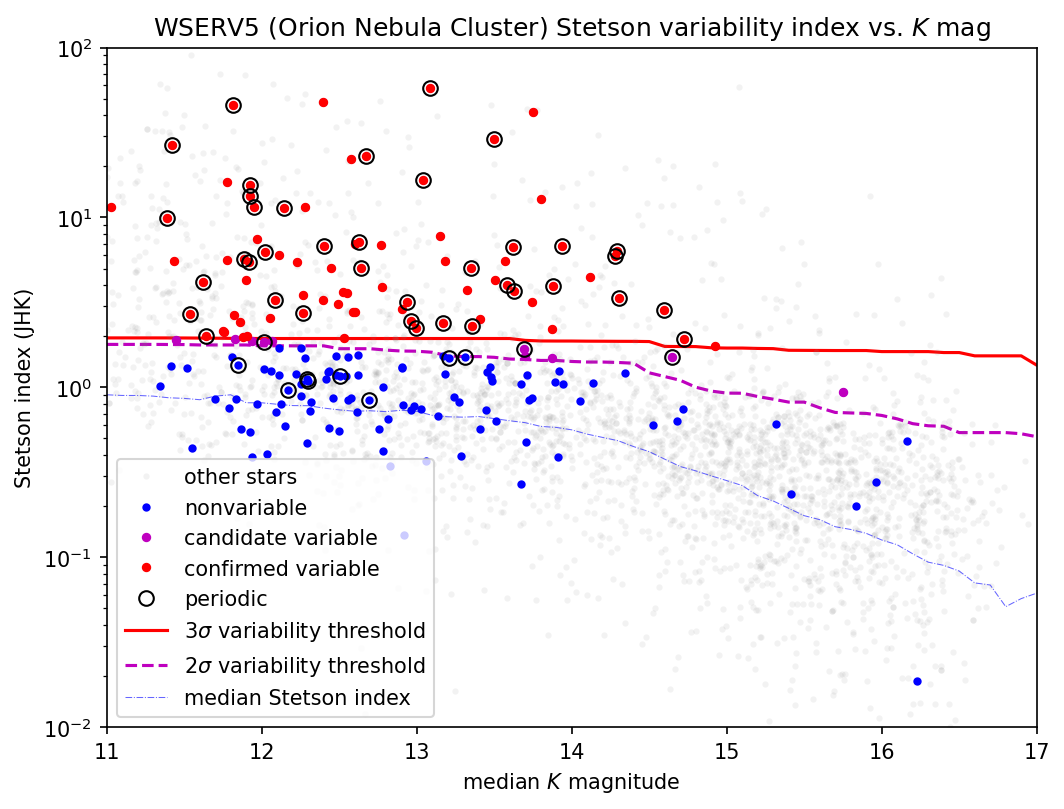

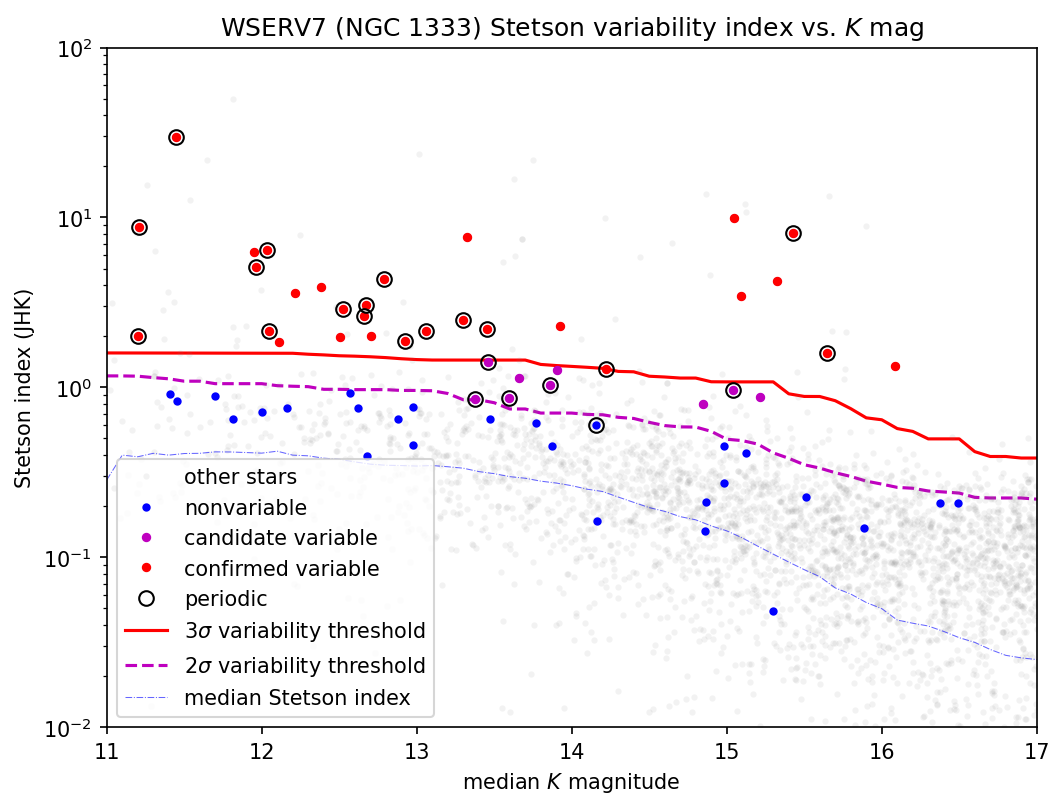

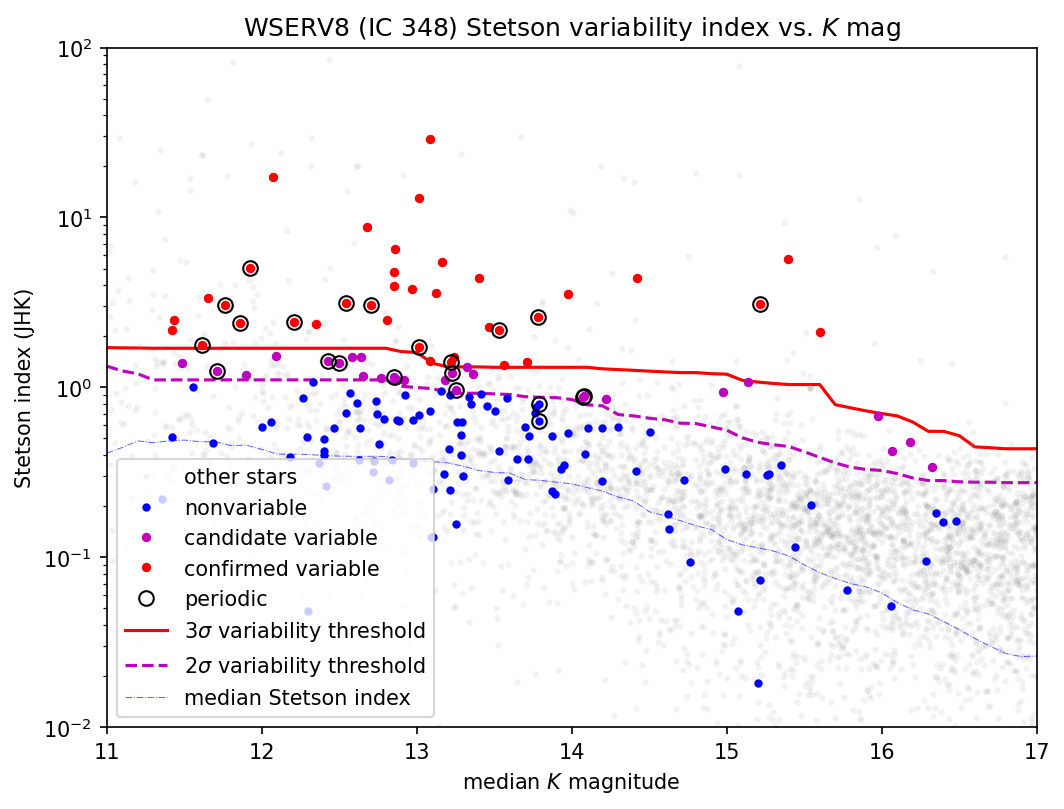

In [58]:
wserv_ids = [1, 5, 7, 8, 11]

# n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

min_Stetson_list = [2, 3, 1.6, 1.6, 4]

SFR_names = ["Cyg OB7", "Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    if wserv in [5, 7, 8]:
    
        ds = spread[f'wserv{wserv}']

        q0 = sv.sq0(ds, n_min, n_max)
#         q1 = sq1(ds, n_min, n_max)

        q1_j = sv.sq1_j(ds, n_min, n_max)
        q1_h = sv.sq1_h(ds, n_min, n_max)
        q1_k = sv.sq1_k(ds, n_min, n_max)
        
        q2 = sv.sq2(ds, n_min, n_max)

#         v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
#         v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
#         v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
        suffix_997 = '_m_997'
        suffix_95 = '_m_95'
        curve_Stetson(ds, StetsonJHK_dict[wserv][0], StetsonJHK_dict[wserv][1], '_m_997')
        curve_Stetson(ds, StetsonJHK_dict_95[wserv][0], StetsonJHK_dict_95[wserv][1], '_m_95')
        for bands in ['JH', 'JK', 'HK']:
            curve_Stetson(
                ds, 
                StetsonJHK_dict[wserv][0], 
                StetsonJHK_dict[wserv][1], 
                '_m_997', 
                input_column=f'Stetson_{bands}'
            )
       
        v_jhk = sv_jhk(ds, Stetson_cutoff=0, suffix=suffix_997)        
#         v2 = sq2_variables()
        v_jh = sv_jh(ds, Stetson_cutoff=0, suffix=suffix_997)        
        v_jk = sv_jk(ds, Stetson_cutoff=0, suffix=suffix_997)        
        v_hk = sv_hk(ds, Stetson_cutoff=0, suffix=suffix_997)

        v2 = q2 & (v_jhk | v_jk | v_hk | v_jh)

        v1_jh = q1_j & q1_h & v_jh
        v1_jk = q1_j & q1_k & v_jk
        v1_hk = q1_h & q1_k & v_hk
        
        v1 = (v1_jh & q1_j & q1_h) | (v1_hk & q1_k & q1_h) | (v1_jk & q1_j & q1_k)
        
        v_ = v1 | v2
        
        v0 = (v_jhk | v1_jh | v1_jk | v1_hk) & ~v1 & ~v2

        v_jhk_cand = sv_jhk(ds, Stetson_cutoff=0, suffix=suffix_95)   
        
        v_cand = q2 & v_jhk_cand & ~v_
        
        bd = np.in1d(ds.index, approved[wserv].values)
        per_bd = np.in1d(ds.index, periodic[wserv].values)
    
        fig2, ax2 = plt.subplots(ncols=1, figsize=(8,6), dpi=150)


        asc = 0.1

        ax2.plot(ds[q2]['median']['KAPERMAG3'], ds[q2]['variability']['Stetson_JHK'], '.', color='0.5', alpha=asc, markeredgecolor='None', label='other stars')
        ax2.plot(ds[q2 & bd]['median']['KAPERMAG3'], ds[q2 & bd]['variability']['Stetson_JHK'], 'bo', ms=3, label='nonvariable')
        ax2.plot(ds[q2 & bd & v_jhk_cand & ~v2]['median']['KAPERMAG3'], ds[q2 & bd & v_jhk_cand & ~v2]['variability']['Stetson_JHK'], 'mo', ms=3.5, label='candidate variable')
        ax2.plot(ds[bd & v2]['median']['KAPERMAG3'], ds[bd & v2]['variability']['Stetson_JHK'], 'ro', ms=3.5, label='confirmed variable')
        ax2.plot(ds[q2 & per_bd]['median']['KAPERMAG3'], ds[q2 & per_bd]['variability']['Stetson_JHK'], 'o', color='black', markerfacecolor='None', ms=7, mew=1, label='periodic')

        ax2.plot(StetsonJHK_dict[wserv][0], StetsonJHK_dict[wserv][1], 'r-', zorder=-10, label=r'3$\sigma$ variability threshold')
        ax2.plot(StetsonJHK_dict_95[wserv][0], StetsonJHK_dict_95[wserv][1], 'm--', zorder=-10, label=r'2$\sigma$ variability threshold')
        
        ax2.plot(StetsonJHK_dict_50[wserv][0], StetsonJHK_dict_50[wserv][1], 'b-.', lw=0.5, alpha=0.6, label=r'median Stetson index')
       
        print(f"WSERV{wserv}:")
        print(f"  VLMS stars in our data: {np.sum(bd)}")
        print(f"  VLMS Q=2 stars: {np.sum(bd & q2)}")
        print(f"  VLMS Q=2 variables (ignoring periodicity): {np.sum(bd & q2 & v2)}")
        print(f"  VLMS Q=2 'almost' variables: {np.sum(bd & q2 & v_jhk_cand & ~v2)}")
        print(f"  VLMS Q=2 periodic: {np.sum(bd & q2 & per_bd)}")
        print(f"  VLMS Q=2 variables (incl. periodics): {np.sum(bd & q2 & (v2 | per_bd))}")
        print("")
        print(f"BDs:                {np.sum(bd)}")
        print(f"BDs (Q=2):          {np.sum(bd & q2)}")
        print(f"Periodic BDs:       {np.sum(bd & per_bd)}")
        print(f"Periodic BDs (Q=2): {np.sum(bd & per_bd & q2)}")

        print(f"Variable BDs (Q=2): {np.sum(bd & v2)}")
        print(f"  '' - periodics  : {np.sum(bd & v2 & ~per_bd)}")
        print(f"Variable BDs (Q=1): {np.sum(bd & v1)}")
        print(f"  '' - v2:          {np.sum(bd & v1 & ~v2)}")

        print(f"V0 BDs (Q=0):       {np.sum(bd & v0)}")
        print(f"Variable BDs (Q=1+2+per): {np.sum(bd & (v1 | v2 | per_bd))}")    
        print("\n\n")
        
        #### PRINTING PERIODIC VARIABLES ####
        
        print(f"Periodic variables ({np.sum(bd & per_bd)}): ", ds[bd & per_bd].index)

        #### PRINTING NONPERIODIC VARIABLES ####
        
        print(f"Nonperiodic variables ({np.sum(bd & v_ & ~per_bd)}): ", ds[bd & v_ & ~per_bd].index)

        #### PRINTING NONPERIODIC VARIABLE CANDIDATES ####
        
        print(f"Nonperiodic variable candidates ({np.sum(bd & v_cand & ~per_bd)}): ", ds[bd & v_cand & ~per_bd].index)

        #### PRINTING NONPERIODIC VARIABLE CANDIDATES ####
        
        print(f"Nonperiodic variable followup candidates ({np.sum(bd & v0 & ~v_cand & ~per_bd)}): ", ds[bd & v0 & ~v_cand & ~per_bd].index)

        #### PRINTING NONVARIABLES ####
        
        print(f"Nonvariables ({np.sum(bd & ~v0 & ~v_cand & ~v_ & ~per_bd)}): ", ds[bd & ~v0 & ~v_cand & ~v_ & ~per_bd].index)

        ax2.semilogy()
#         ax2.axhline(S, color='k', lw=1, alpha=0.5)
        ax2.set_ylim(1e-2, 1e2)
        ax2.set_xlim(11, 17)
        ax2.set_ylabel("Stetson index (JHK)")
        ax2.set_xlabel("median $K$ magnitude")
        
        ax2.legend(loc='lower left')

        ax2.set_title(f"WSERV{wserv} ({SFR_dict[wserv]}) Stetson variability index vs. $K$ mag")


#         plt.show()
        
        


In [45]:
print(f"BDs:                {np.sum(bd)}")
print(f"BDs (Q=2):          {np.sum(bd & q2)}")
print(f"Periodic BDs:       {np.sum(bd & per_bd)}")
print(f"Periodic BDs (Q=2): {np.sum(bd & per_bd & q2)}")

print(f"Variable BDs (Q=2): {np.sum(bd & v2)}")
print(f"  '' - periodics  : {np.sum(bd & v2 & ~per_bd)}")
print(f"Variable BDs (Q=1): {np.sum(bd & v1)}")
print(f"  '' - v2:          {np.sum(bd & v1 & ~v2)}")

print(f"V0 BDs (Q=0):       {np.sum(bd & v0)}")
print(f"Variable BDs (Q=1+2+per): {np.sum(bd & (v1 | v2 | per_bd))}")


np.sum((v1_jh | v1_jk | v1_hk) & ~v2 & bd)

BDs:                331
BDs (Q=2):          193
Periodic BDs:       78
Periodic BDs (Q=2): 49
Variable BDs (Q=2): 81
  '' - periodics  : 43
Variable BDs (Q=1): 47
  '' - v2:          5
V0 BDs (Q=0):       68
Variable BDs (Q=1+2+per): 122


5

In [20]:
np.sum(v2 & bd)

81

10      0.903965
17      1.770217
21      2.950133
23      3.410000
24      3.660000
         ...    
310     8.645507
316     3.286577
318     3.100000
329    11.123479
333     1.800000
Name: Period, Length: 78, dtype: float64
10     0.008105
17     0.073239
21     0.012874
23     0.008000
24     0.084757
         ...   
310    0.073095
316    0.049339
318    0.020000
329    0.018845
333    0.012000
Name: Amp, Length: 78, dtype: float64
Range of periods for W5: 0.4 - 12.1
Range of amplitudes for W5: 0.008 - 0.360
3      0.930000
8      1.695196
12     4.100000
14     3.795052
19     2.282054
22     3.398651
23     1.360000
24     1.414955
28     3.440000
34     4.140000
35     1.552226
41     2.148219
55     4.380000
57     3.428558
60    26.454916
63     4.136775
67     3.167885
68     2.230000
70     2.200000
71     1.209234
72     2.440000
73     3.160000
82     5.283531
85     0.770000
88     2.430127
90     3.486128
92     3.660000
93     2.514659
99     1.584863
Name: Period, dt

Text(0.5, 0.91, 'Histograms of periods per region')

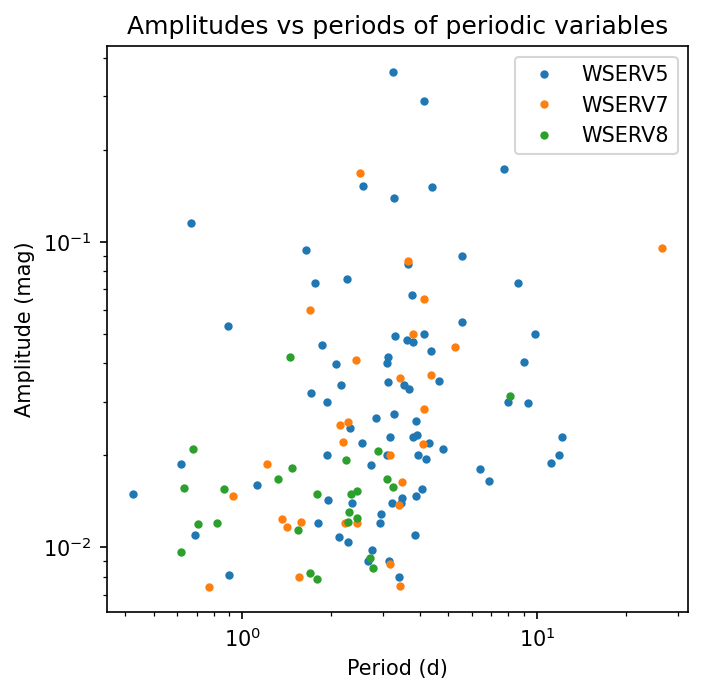

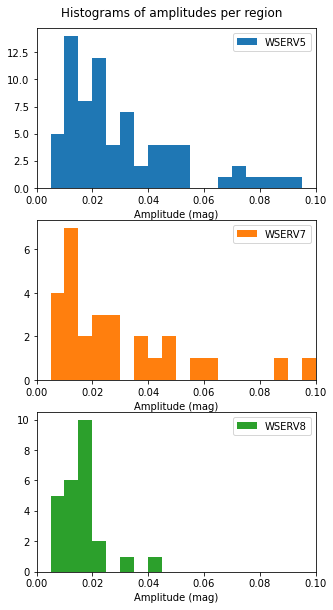

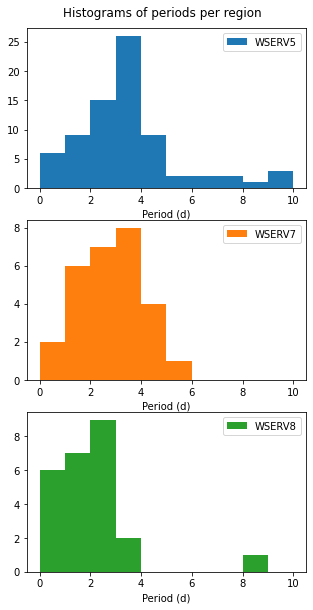

In [102]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150)

fig2, axes = plt.subplots(nrows=3, figsize=(5,10))
ax_dict = {5: axes[0], 7: axes[1], 8: axes[2]}
fig3, axes3 = plt.subplots(nrows=3, figsize=(5,10))
ax_dict3 = {5: axes3[0], 7: axes3[1], 8: axes3[2]}
color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    if wserv in [5, 7, 8]:
    
        ds = spread[f'wserv{wserv}']
        per_bd = np.in1d(ds.index, periodic[wserv].values)
        
        per
        
        print(periodic[wserv]['Period'])
        print(periodic[wserv]['Amp'])        
        
        print(f"Range of periods for W{wserv}: {np.min(periodic[wserv]['Period']):.1f} - {np.max(periodic[wserv]['Period']):.1f}")
        print(f"Range of amplitudes for W{wserv}: {np.min(periodic[wserv]['Amp']):.3f} - {np.max(periodic[wserv]['Amp']):.3f}")
        
        ax.plot(periodic[wserv]['Period'], periodic[wserv]['Amp'], '.', label=f'WSERV{wserv}')
        ax_dict[wserv].hist(periodic[wserv]['Amp'], range=[0, 0.1], bins=20, color=color_dict[wserv], label=f'WSERV{wserv}')
        ax_dict[wserv].set_xlim(0, 0.1)
        ax_dict[wserv].set_xlabel("Amplitude (mag)")
        ax_dict[wserv].legend()
        ax_dict3[wserv].hist(periodic[wserv]['Period'], color=color_dict[wserv], range=[0,10], label=f'WSERV{wserv}') #, range=[0, 0.1], bins=20, color=color_dict[wserv]
#         ax_dict3[wserv].set_xlim(0, 0.1)
        ax_dict3[wserv].set_xlabel("Period (d)")
        ax_dict3[wserv].legend()

ax.loglog() 
ax.set_xlabel("Period (d)")
ax.set_ylabel("Amplitude (mag)")
ax.set_title("Amplitudes vs periods of periodic variables")
ax.legend()

fig2.suptitle("Histograms of amplitudes per region", y=0.91)
fig3.suptitle("Histograms of periods per region", y=0.91)

In [114]:
p5 = periodic[5]
p7 = periodic[7]
p8 = periodic[8]

In [126]:
import astropy.table
t5 = astropy.table.Table()
t7 = astropy.table.Table()
t8 = astropy.table.Table()

for wserv, pp, tt in zip([5,7,8], [p5, p7, p8], [t5, t7, t8]):

    tt['SOURCEID'] = pp['SOURCEID']
    tt['SpT'] = pp["SpT"]
    tt['Teff'] = pp["Teff"]
    tt['Period'] = pp['Period']
    tt['Amp'] = pp['Amp']
    tt['K_mag'] = pp['K_mag']
    tt['K_err'] = spread['wserv'+str(wserv)]['median']['KAPERMAG3ERR'][pp['SOURCEID']]

t5.write("WSERV5_periods_amplitudes_etc.txt", format='ascii.ipac')
t7.write("WSERV7_periods_amplitudes_etc.txt", format='ascii.ipac')
t8.write("WSERV8_periods_amplitudes_etc.txt", format='ascii.ipac')

(0.0, 0.02729654577560723)

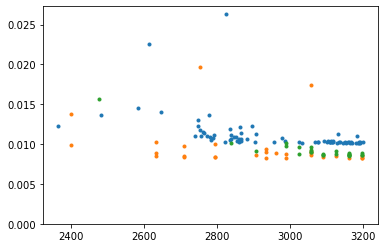

In [117]:
plt.plot(t5['Teff'], t5['K_err'], '.')
plt.plot(t7['Teff'], t7['K_err'], '.')
plt.plot(t8['Teff'], t8['K_err'], '.')

plt.ylim(0, None)

In [124]:
p5['SOURCEID']

10     44199508514777
17     44199508513934
21     44199508513687
23     44199508512696
24     44199508512410
            ...      
310    44199508513170
316    44199508511927
318    44199508511903
329    44199508565018
333    44199508565551
Name: SOURCEID, Length: 78, dtype: int64

In [125]:
np.log10(44199508514777)

13.6454174401521